In [1]:
!pip install pandas_datareader

In [2]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)

# Input Symbol from Yahoo finance

In [4]:
Symbol = "AUDUSD=X"

In [5]:
s1 = datetime.now() - timedelta(400)
s2 = datetime.now() - timedelta(1)

start_date = "{0}-{1}-{2}".format(s1.day, s1.month, s1.year)
end_date = "{0}-{1}-{2}".format(s2.day, s2.month, s2.year)

DF = web.get_data_yahoo(Symbol,start=start_date,end=end_date)

DF1 = DF[["Adj Close"]]
DF1["Mean35"] = DF.rolling(35).mean()[["Adj Close"]]
DF1["Dif"] = abs(DF1["Adj Close"]-DF1['Mean35'])
mean_dif = DF1["Dif"].mean()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
if DF1.loc[end_date]["Dif"] < mean_dif*3 :
    print("Yesterday trend is still going")
else :
    print("Check Price and Check your port")

Yesterday trend is still going


 ## Show days thar Different in price and Moving average more than 3 time mean

In [7]:
DF1[DF1["Dif"] > mean_dif*3]

,Adj Close,Mean35,Dif
Date,,,
2020-03-18,0.599220,0.658815,0.059595
2020-03-19,0.580980,0.656123,0.075143
2020-03-20,0.574290,0.653364,0.079074
2020-03-23,0.575331,0.650678,0.075347
2020-03-24,0.587660,0.648352,0.060692
2020-03-26,0.590810,0.643781,0.052971


## Add Percentage Change

In [8]:
DFtotal = DF.merge(DF1, on = "Date")
DFtotal.drop(columns = ["Adj Close_y"], inplace = True)

In [9]:
DFtotalP = DFtotal.copy()
DFtotalP["Dif Pct"] = (DFtotalP["Dif"]/DFtotalP["Adj Close_x"])*100
DFtotalP.dropna(inplace =True, axis = 0)
DFtotalP

,High,Low,Open,Close,Volume,Adj Close_x,Mean35,Dif,Dif Pct
Date,,,,,,,,,
2020-01-31,0.672900,0.668360,0.670871,0.670826,0,0.670826,0.688650,0.017824,2.657045
2020-02-03,0.670900,0.668440,0.669232,0.669362,0,0.669362,0.688132,0.018770,2.804214
2020-02-04,0.673530,0.668061,0.668999,0.669050,0,0.669050,0.687607,0.018557,2.773679
2020-02-05,0.677500,0.672490,0.673290,0.673179,0,0.673179,0.687262,0.014083,2.092068
2020-02-06,0.676600,0.673138,0.675178,0.675180,0,0.675180,0.686968,0.011788,1.745923
...,...,...,...,...,...,...,...,...,...
2021-01-13,0.778271,0.772310,0.777480,0.777605,0,0.777605,0.756593,0.021012,2.702084
2021-01-14,0.779310,0.772880,0.774640,0.774713,0,0.774713,0.757686,0.017028,2.197938
2021-01-15,0.778880,0.768250,0.777563,0.777580,0,0.777580,0.758879,0.018701,2.405000


In [10]:
# Pct > 7
DFtotalP[DFtotalP["Dif Pct"] > 7]

,High,Low,Open,Close,Volume,Adj Close_x,Mean35,Dif,Dif Pct
Date,,,,,,,,,
2020-03-16,0.618912,0.608140,0.617871,0.617768,0,0.617768,0.662913,0.045145,7.307722
2020-03-17,0.614800,0.596080,0.610450,0.609942,0,0.609942,0.661021,0.051079,8.374374
2020-03-18,0.602678,0.581791,0.598830,0.599220,0,0.599220,0.658815,0.059595,9.945441
2020-03-19,0.596240,0.552000,0.579950,0.580980,0,0.580980,0.656123,0.075143,12.933782
2020-03-20,0.597850,0.571177,0.574640,0.574290,0,0.574290,0.653364,0.079074,13.769028
2020-03-23,0.584020,0.570210,0.575526,0.575331,0,0.575331,0.650678,0.075347,13.096257
2020-03-24,0.597410,0.586889,0.587630,0.587660,0,0.587660,0.648352,0.060692,10.327790
2020-03-25,0.606999,0.593450,0.596840,0.597550,0,0.597550,0.646192,0.048641,8.140149
2020-03-26,0.606550,0.587150,0.590440,0.590810,0,0.590810,0.643781,0.052971,8.965858


In [11]:
# Pct > 5 and < 7
DFtotalP[DFtotalP["Dif Pct"] > 5][DFtotalP["Dif Pct"] < 7]

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,High,Low,Open,Close,Volume,Adj Close_x,Mean35,Dif,Dif Pct
Date,,,,,,,,,
2020-03-13,0.632310,0.615400,0.628210,0.627412,0,0.627412,0.664697,0.037285,5.942656
2020-03-27,0.613098,0.602500,0.607510,0.607910,0,0.607910,0.641910,0.034000,5.592883
2020-04-05,0.610560,0.599240,0.599628,0.599470,0,0.599470,0.631599,0.032129,5.359596
2020-04-29,0.656960,0.649170,0.655500,0.655501,0,0.655501,0.618744,0.036757,5.607466
2020-06-02,0.698300,0.685758,0.691530,0.691420,0,0.691420,0.649327,0.042093,6.087859
2020-06-03,0.698800,0.688390,0.692914,0.692905,0,0.692905,0.651099,0.041806,6.033373
2020-06-04,0.701330,0.693200,0.694200,0.693990,0,0.693990,0.652760,0.041230,5.941009
2020-06-07,0.700400,0.696280,0.699300,0.700240,0,0.700240,0.654652,0.045588,6.510324
2020-06-08,0.704077,0.690030,0.702300,0.702449,0,0.702449,0.656591,0.045858,6.528302


[]

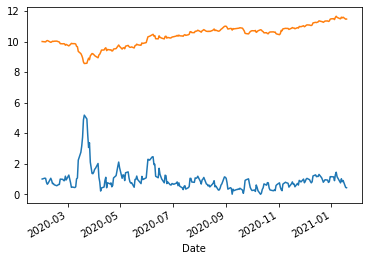

In [12]:
# compare price and Mean
DFtotalP0 = DFtotalP/DFtotalP.iloc[0]
PPPPP = DFtotalP0['Adj Close_x']*10
DFtotalP0['Dif Pct'].plot()
PPPPP.plot()
plt.plot()

## Price higher or lower than mean

### Price higher than mean

In [13]:
DFtotal[DFtotal["Adj Close_x"]>DFtotal["Mean35"]]

,High,Low,Open,Close,Volume,Adj Close_x,Mean35,Dif
Date,,,,,,,,
2020-04-09,0.637000,0.631460,0.633500,0.633260,0,0.633260,0.626262,0.006998
2020-04-12,0.638529,0.633210,0.633931,0.633521,0,0.633521,0.625486,0.008035
2020-04-13,0.643261,0.637662,0.639810,0.640111,0,0.640111,0.624883,0.015228
2020-04-14,0.643459,0.628540,0.643376,0.643430,0,0.643430,0.624395,0.019035
2020-04-15,0.633200,0.626649,0.630900,0.630890,0,0.630890,0.623716,0.007174
...,...,...,...,...,...,...,...,...
2021-01-13,0.778271,0.772310,0.777480,0.777605,0,0.777605,0.756593,0.021012
2021-01-14,0.779310,0.772880,0.774640,0.774713,0,0.774713,0.757686,0.017028
2021-01-15,0.778880,0.768250,0.777563,0.777580,0,0.777580,0.758879,0.018701


### price lower than mean

In [14]:
DFtotal[DFtotal["Adj Close_x"]<DFtotal["Mean35"]]

,High,Low,Open,Close,Volume,Adj Close_x,Mean35,Dif
Date,,,,,,,,
2020-01-31,0.672900,0.668360,0.670871,0.670826,0,0.670826,0.688650,0.017824
2020-02-03,0.670900,0.668440,0.669232,0.669362,0,0.669362,0.688132,0.018770
2020-02-04,0.673530,0.668061,0.668999,0.669050,0,0.669050,0.687607,0.018557
2020-02-05,0.677500,0.672490,0.673290,0.673179,0,0.673179,0.687262,0.014083
2020-02-06,0.676600,0.673138,0.675178,0.675180,0,0.675180,0.686968,0.011788
...,...,...,...,...,...,...,...,...
2020-10-28,0.715717,0.703970,0.712200,0.712310,0,0.712310,0.716861,0.004551
2020-10-29,0.707914,0.700460,0.705540,0.705520,0,0.705520,0.716228,0.010708
2020-10-30,0.707090,0.701218,0.703640,0.703760,0,0.703760,0.715584,0.011824


## Check condition is higher or lower

In [15]:
if DFtotal.loc[end_date]["Close"] < DFtotal.loc[end_date]["Mean35"]  :
    print("Today price is lower than mean")
else :
    print("Today price is higher than mean")

Today price is higher than mean


In [16]:
df_sort = DFtotal.sort_values(by = "Dif", ascending = False)
df_sort.dropna(inplace =True, axis = 0)
df_sort

,High,Low,Open,Close,Volume,Adj Close_x,Mean35,Dif
Date,,,,,,,,
2020-03-20,0.597850,0.571177,0.574640,0.574290,0,0.574290,0.653364,0.079074
2020-03-23,0.584020,0.570210,0.575526,0.575331,0,0.575331,0.650678,0.075347
2020-03-19,0.596240,0.552000,0.579950,0.580980,0,0.580980,0.656123,0.075143
2020-03-24,0.597410,0.586889,0.587630,0.587660,0,0.587660,0.648352,0.060692
2020-03-18,0.602678,0.581791,0.598830,0.599220,0,0.599220,0.658815,0.059595
...,...,...,...,...,...,...,...,...
2020-04-08,0.631300,0.619660,0.623519,0.623531,0,0.623531,0.627065,0.003534
2020-10-12,0.720918,0.715733,0.720918,0.721188,0,0.721188,0.722592,0.001404
2020-09-21,0.723700,0.716590,0.722830,0.723118,0,0.723118,0.724336,0.001218


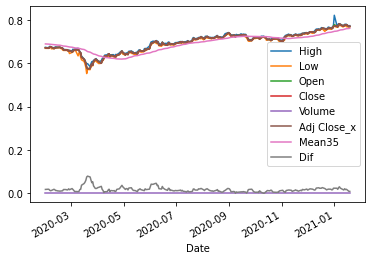

In [17]:
df_sort.plot()

[]

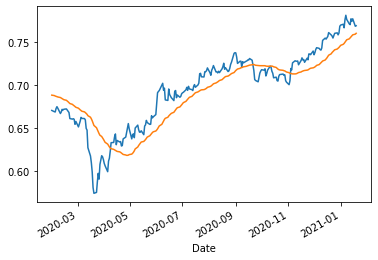

In [18]:
# compare price and Mean
df_sort['Adj Close_x'].plot()
df_sort['Mean35'].plot()
plt.plot()

[]

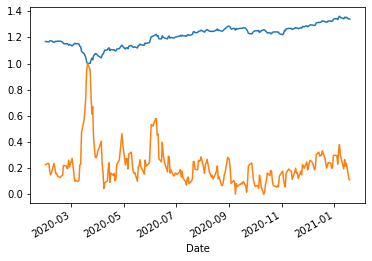

In [19]:
# compare price and Dif
df_sort0 = df_sort/df_sort.iloc[0]
df_sort0['Adj Close_x'].plot()
df_sort0['Dif'].plot()
plt.plot()

In [20]:
df_sort['quantile'] = pd.qcut(df_sort['Dif'], 100, labels=False)
df_sort

,High,Low,Open,Close,Volume,Adj Close_x,Mean35,Dif,quantile
Date,,,,,,,,,
2020-03-20,0.597850,0.571177,0.574640,0.574290,0,0.574290,0.653364,0.079074,99
2020-03-23,0.584020,0.570210,0.575526,0.575331,0,0.575331,0.650678,0.075347,99
2020-03-19,0.596240,0.552000,0.579950,0.580980,0,0.580980,0.656123,0.075143,99
2020-03-24,0.597410,0.586889,0.587630,0.587660,0,0.587660,0.648352,0.060692,98
2020-03-18,0.602678,0.581791,0.598830,0.599220,0,0.599220,0.658815,0.059595,98
...,...,...,...,...,...,...,...,...,...
2020-04-08,0.631300,0.619660,0.623519,0.623531,0,0.623531,0.627065,0.003534,1
2020-10-12,0.720918,0.715733,0.720918,0.721188,0,0.721188,0.722592,0.001404,1
2020-09-21,0.723700,0.716590,0.722830,0.723118,0,0.723118,0.724336,0.001218,0


In [21]:
df_sorted = df_sort.sort_values(by = "Date")
df_sorted

,High,Low,Open,Close,Volume,Adj Close_x,Mean35,Dif,quantile
Date,,,,,,,,,
2020-01-31,0.672900,0.668360,0.670871,0.670826,0,0.670826,0.688650,0.017824,63
2020-02-03,0.670900,0.668440,0.669232,0.669362,0,0.669362,0.688132,0.018770,68
2020-02-04,0.673530,0.668061,0.668999,0.669050,0,0.669050,0.687607,0.018557,67
2020-02-05,0.677500,0.672490,0.673290,0.673179,0,0.673179,0.687262,0.014083,44
2020-02-06,0.676600,0.673138,0.675178,0.675180,0,0.675180,0.686968,0.011788,30
...,...,...,...,...,...,...,...,...,...
2021-01-13,0.778271,0.772310,0.777480,0.777605,0,0.777605,0.756593,0.021012,77
2021-01-14,0.779310,0.772880,0.774640,0.774713,0,0.774713,0.757686,0.017028,57
2021-01-15,0.778880,0.768250,0.777563,0.777580,0,0.777580,0.758879,0.018701,67


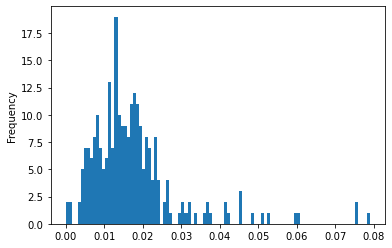

In [22]:
df_sorted["Dif"].plot(kind = "hist", bins = 100)

## Add percentile

### percentile > 97

In [23]:
df_sort[df_sort['quantile']>97]

,High,Low,Open,Close,Volume,Adj Close_x,Mean35,Dif,quantile
Date,,,,,,,,,
2020-03-20,0.597850,0.571177,0.574640,0.574290,0,0.574290,0.653364,0.079074,99
2020-03-23,0.584020,0.570210,0.575526,0.575331,0,0.575331,0.650678,0.075347,99
2020-03-19,0.596240,0.552000,0.579950,0.580980,0,0.580980,0.656123,0.075143,99
2020-03-24,0.597410,0.586889,0.587630,0.587660,0,0.587660,0.648352,0.060692,98
2020-03-18,0.602678,0.581791,0.598830,0.599220,0,0.599220,0.658815,0.059595,98
2020-03-26,0.606550,0.587150,0.590440,0.590810,0,0.590810,0.643781,0.052971,98


In [24]:
# 20 days Before event
df_sorted.loc["2020-02-24":"2020-03-8"]

,High,Low,Open,Close,Volume,Adj Close_x,Mean35,Dif,quantile
Date,,,,,,,,,
2020-02-24,0.662100,0.658780,0.660559,0.660690,0,0.660690,0.677899,0.017209,59
2020-02-25,0.662400,0.658718,0.661120,0.661201,0,0.661201,0.676970,0.015769,52
2020-02-26,0.660600,0.655340,0.660450,0.660520,0,0.660520,0.676241,0.015721,51
2020-02-27,0.659152,0.654639,0.654892,0.654652,0,0.654652,0.675305,0.020654,75
2020-02-28,0.658490,0.644300,0.658060,0.658020,0,0.658020,0.674525,0.016505,55
2020-03-02,0.656900,0.648940,0.651538,0.651631,0,0.651631,0.673427,0.021796,79
2020-03-03,0.664500,0.650999,0.654580,0.654750,0,0.654750,0.672423,0.017674,62
2020-03-04,0.662900,0.658650,0.658650,0.658220,0,0.658220,0.671525,0.013306,40
2020-03-05,0.663702,0.658618,0.662630,0.662690,0,0.662690,0.670723,0.008033,15


set event date at 2020-03-20

In [25]:
# 10 days Before event
df_sorted.loc["2020-03-8":"2020-03-19"]

,High,Low,Open,Close,Volume,Adj Close_x,Mean35,Dif,quantile
Date,,,,,,,,,
2020-03-09,0.668350,0.633590,0.661424,0.661358,0,0.661358,0.669141,0.007783,13
2020-03-10,0.660500,0.647429,0.660060,0.659800,0,0.659800,0.668345,0.008545,18
2020-03-11,0.653950,0.648959,0.649570,0.649910,0,0.649910,0.667352,0.017442,61
2020-03-12,0.648100,0.626999,0.647850,0.647940,0,0.647940,0.666313,0.018373,66
2020-03-13,0.632310,0.615400,0.628210,0.627412,0,0.627412,0.664697,0.037285,94
2020-03-16,0.618912,0.608140,0.617871,0.617768,0,0.617768,0.662913,0.045145,96
2020-03-17,0.614800,0.596080,0.610450,0.609942,0,0.609942,0.661021,0.051079,97
2020-03-18,0.602678,0.581791,0.598830,0.599220,0,0.599220,0.658815,0.059595,98
2020-03-19,0.596240,0.552000,0.579950,0.580980,0,0.580980,0.656123,0.075143,99


In [26]:
# 10 days After event
df_sorted.loc["2020-03-20":"2020-04-2"]

,High,Low,Open,Close,Volume,Adj Close_x,Mean35,Dif,quantile
Date,,,,,,,,,
2020-03-20,0.597850,0.571177,0.574640,0.574290,0,0.574290,0.653364,0.079074,99
2020-03-23,0.584020,0.570210,0.575526,0.575331,0,0.575331,0.650678,0.075347,99
2020-03-24,0.597410,0.586889,0.587630,0.587660,0,0.587660,0.648352,0.060692,98
2020-03-25,0.606999,0.593450,0.596840,0.597550,0,0.597550,0.646192,0.048641,97
2020-03-26,0.606550,0.587150,0.590440,0.590810,0,0.590810,0.643781,0.052971,98
2020-03-27,0.613098,0.602500,0.607510,0.607910,0,0.607910,0.641910,0.034000,92
2020-03-29,0.618230,0.611700,0.617219,0.618058,0,0.618058,0.640505,0.022446,81
2020-03-30,0.620970,0.608170,0.616432,0.616899,0,0.616899,0.639016,0.022117,80
2020-03-31,0.614640,0.604120,0.614010,0.613700,0,0.613700,0.637347,0.023648,85


In [27]:
# 20 days After event
df_sorted.loc["2020-04-2":"2020-04-13"]

,High,Low,Open,Close,Volume,Adj Close_x,Mean35,Dif,quantile
Date,,,,,,,,,
2020-04-02,0.607600,0.598170,0.606890,0.606322,0,0.606322,0.633689,0.027367,90
2020-04-05,0.610560,0.599240,0.599628,0.599470,0,0.599470,0.631599,0.032129,92
2020-04-06,0.620848,0.609850,0.611830,0.611760,0,0.611760,0.629901,0.018141,65
2020-04-07,0.623679,0.611741,0.615450,0.615220,0,0.615220,0.628347,0.013127,39
2020-04-08,0.631300,0.619660,0.623519,0.623531,0,0.623531,0.627065,0.003534,1
2020-04-09,0.637000,0.631460,0.633500,0.633260,0,0.633260,0.626262,0.006998,11
2020-04-12,0.638529,0.633210,0.633931,0.633521,0,0.633521,0.625486,0.008035,15
2020-04-13,0.643261,0.637662,0.639810,0.640111,0,0.640111,0.624883,0.015228,49


In [28]:
# 30 days After event
df_sorted.loc["2020-04-13":"2020-04-24"]

,High,Low,Open,Close,Volume,Adj Close_x,Mean35,Dif,quantile
Date,,,,,,,,,
2020-04-13,0.643261,0.637662,0.639810,0.640111,0,0.640111,0.624883,0.015228,49
2020-04-14,0.643459,0.628540,0.643376,0.643430,0,0.643430,0.624395,0.019035,69
2020-04-15,0.633200,0.626649,0.630900,0.630890,0,0.630890,0.623716,0.007174,12
2020-04-16,0.638244,0.631680,0.636173,0.635860,0,0.635860,0.623083,0.012777,35
2020-04-19,0.639341,0.633730,0.634011,0.634019,0,0.634019,0.622579,0.011439,28
2020-04-20,0.634650,0.625520,0.634650,0.634570,0,0.634570,0.622003,0.012567,33
2020-04-21,0.635300,0.628170,0.629680,0.629400,0,0.629400,0.621179,0.008220,17
2020-04-22,0.640500,0.628870,0.629800,0.629900,0,0.629900,0.620243,0.009657,23
2020-04-23,0.638410,0.633860,0.637841,0.637680,0,0.637680,0.619561,0.018119,64


### percentile < 3

In [29]:
df_sort[df_sort['quantile']<3]

,High,Low,Open,Close,Volume,Adj Close_x,Mean35,Dif,quantile
Date,,,,,,,,,
2020-10-08,0.724200,0.716969,0.717520,0.717800,0,0.717800,0.722289,0.004489,2
2020-10-26,0.714700,0.710470,0.713140,0.713201,0,0.713201,0.717576,0.004375,2
2020-10-05,0.720871,0.714600,0.719130,0.719321,0,0.719321,0.722934,0.003613,1
2020-04-08,0.631300,0.619660,0.623519,0.623531,0,0.623531,0.627065,0.003534,1
2020-10-12,0.720918,0.715733,0.720918,0.721188,0,0.721188,0.722592,0.001404,1
2020-09-21,0.723700,0.716590,0.722830,0.723118,0,0.723118,0.724336,0.001218,0
2020-09-08,0.728100,0.720650,0.720970,0.720940,0,0.720940,0.720798,0.000142,0
2020-10-11,0.723798,0.720620,0.722309,0.722460,0,0.722460,0.722469,0.000010,0


# Normed at Event

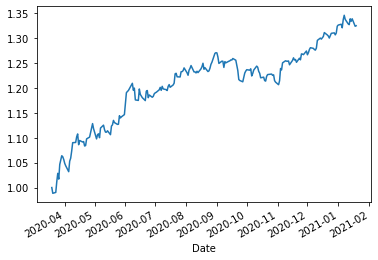

In [30]:
df_sorted["Return"] = df_sorted["Adj Close_x"]/0.580980
actionatevent = df_sorted["Return"]["2020-03-19":]
actionatevent.plot()